<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Itogovyj_blok_Python_dlya_analiza_dannyh/Kondratev_STPY_48_Itogovyj_blok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание к итоговому проекту по курсу "Python для анализа данных"

Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -

https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. `satisfaction_level` - Уровень удовлетворенности работой
2. `Last_evaluation` - Время с момента последней оценки в годах
3. `number_projects` - Количество проектов, выполненных за время работы
4. `average_monthly_hours` - Среднее количество часов на рабочем месте в месяц
5. `time_spend_company` - Стаж работы в компании в годах
6. `work_accident` - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. `left` - уволился ли сотрудник
8. `promotion_last_5years` - повышался ли сотрудник за последние пять лет
9. `department` - отдел в котором работает сотрудник
10. `salary` - относительный уровень зарплаты


**Требуется выполнить следующее задание:**

**Задание - Баллы**

1. Загрузите файл HR.csv в pandas dataframe - 5

2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение). - 10

3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные. - 10

4. Рассчитайте сколько сотрудников работает в каждом
департаменте. - 5

5. Показать распределение сотрудников по зарплатам. - 5

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности - 5

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом - 10

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности): - 10
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки - 20

10. Загрузить jupyter notebook с решение на github и прислать ссылку - 5

Итого - максимум 85 баллов

Для зачета необходимо набрать минимум 55

### Импорт библиотек

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import scipy.stats as stats
# Импорт библиотек

### Загрузка файла HR.csv в pandas dataframe

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Statistika_v_Python/Itogovyj_blok_Python_dlya_analiza_dannyh/HR.csv')
# Загружаем данные
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [45]:
# Проверка наличия пропущенных значений
missing_values = data.isnull().sum()
print(missing_values)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Рассчитаем основные статистики для переменных

Непрерывные столбцы:

- satisfaction_level (Уровень удовлетворенности)
- last_evaluation (Последняя оценка)
- number_projects (Количество проектов)
- average_monthly_hours (Среднее количество часов в месяц)
- time_spend_company (Стаж работы в компании)


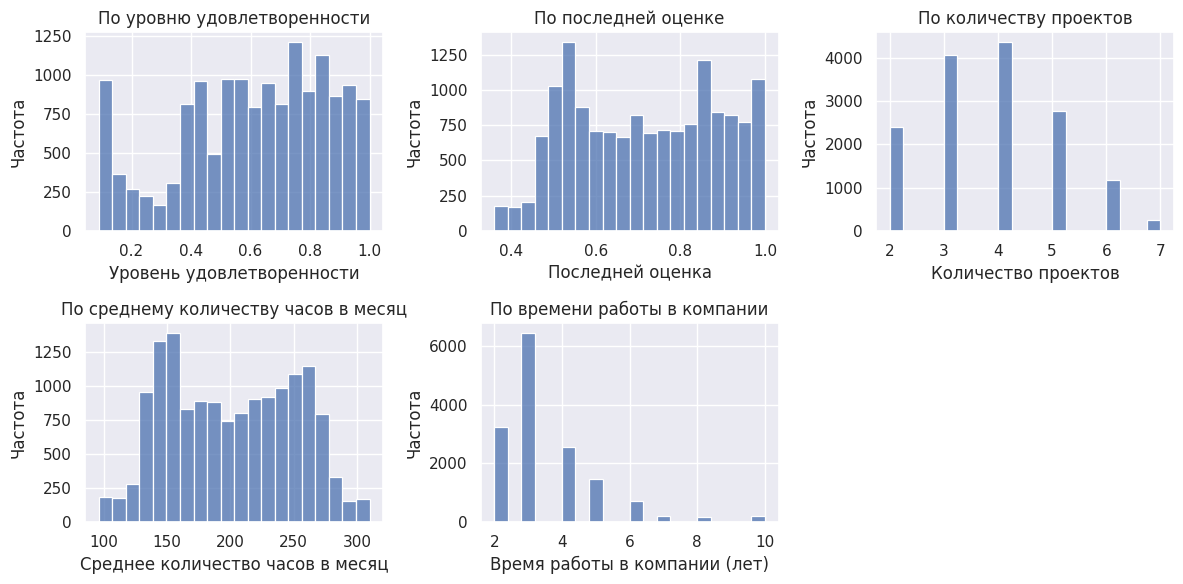


Расчет базовых статистик:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [46]:
# Посмотрим на распределение данных
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)  # Первый график
sns.histplot(data["satisfaction_level"], bins=20)
plt.xlabel("Уровень удовлетворенности")
plt.ylabel("Частота")
plt.title("По уровню удовлетворенности")

plt.subplot(2, 3, 2)  # Второй график
sns.histplot(data["last_evaluation"], bins=20)
plt.xlabel("Последней оценка")
plt.ylabel("Частота")
plt.title("По последней оценке")

plt.subplot(2, 3, 3)  # Третий график
sns.histplot(data["number_project"], bins=20)
plt.xlabel("Количество проектов")
plt.ylabel("Частота")
plt.title("По количеству проектов")

plt.subplot(2, 3, 4)  # Четвёртый график
sns.histplot(data["average_montly_hours"], bins=20)
plt.xlabel("Среднее количество часов в месяц")
plt.ylabel("Частота")
plt.title("По среднему количеству часов в месяц")

plt.subplot(2, 3, 5)  # Пятый график
sns.histplot(data["time_spend_company"], bins=20)
plt.xlabel("Время работы в компании (лет)")
plt.ylabel("Частота")
plt.title("По времени работы в компании")

plt.tight_layout()
plt.show()

# Расчет основных статистик для переменных
statistics = data[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company"]].describe()

# Вывод статистик
print()
print('Расчет базовых статистик:')
statistics


На основе базовых статистик и оценки нормальности распределения данных можно сделать следующие выводы:

1. Уровень удовлетворенности (satisfaction_level):
   - Стандартное отклонение равно 0.25, что говорит о сравнительно большой вариации в уровне удовлетворенности.
   - Распределение данной переменной не является нормальным и имеет форму, приближенную к нормальному, с отклонениями в сторону меньших значений.

2. Последняя оценка (last_evaluation):
   - Стандартное отклонение равно 0.17, что говорит о относительно небольшой вариации в оценках последней оценки.
   - Распределение данной переменной также не является нормальным и имеет смещение в сторону более высоких значений.

3. Количество проектов (number_project):
   - Стандартное отклонение равно 1.23, что говорит о некоторой вариативности в количестве проектов.
   - Распределение данной переменной не является нормальным и имеет дискретный характер.

4. Среднее количество часов в месяц (average_montly_hours):
   - Стандартное отклонение равно 49.94, что говорит о сравнительно большой вариации в количестве часов работы в месяц.
   - Распределение данной переменной также не является нормальным и имеет форму, приближенную к нормальному, с отклонениями в сторону меньших значений.

5. Стаж работы в компании (time_spend_company):
   - Стандартное отклонение равно 1.46, что говорит о некоторой вариативности в стаже работы.
   - Распределение данной переменной не является нормальным и имеет дискретный характер.

### Рассчитаем и визуализируем корреляционную матрицу для количественных переменных.

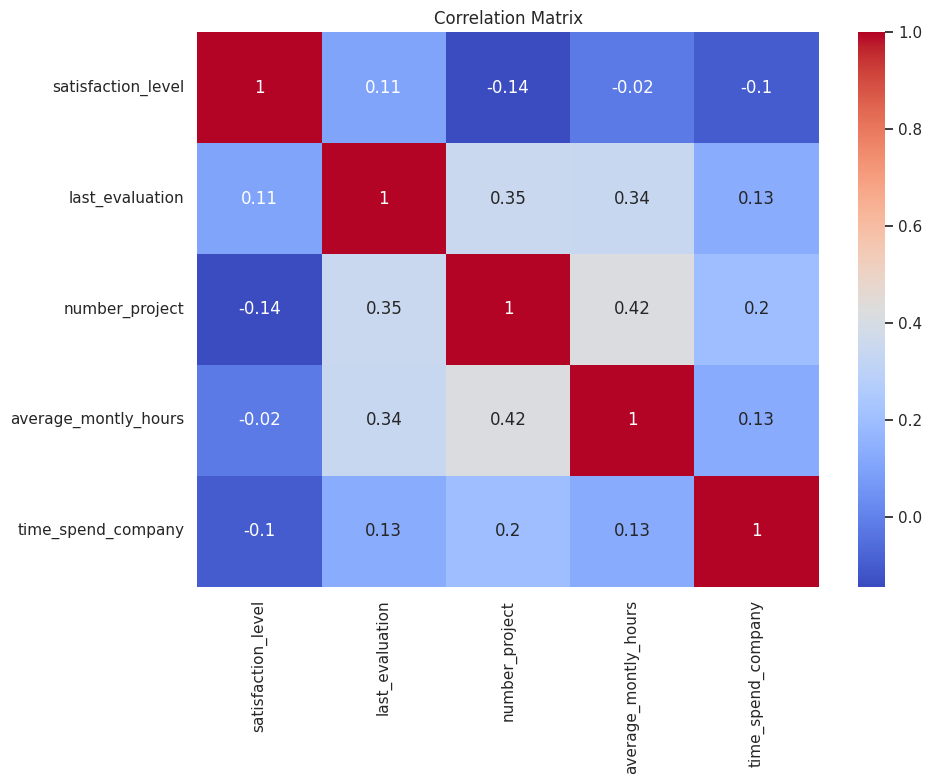


Рассчет корреляционной матрицы:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [47]:
# Выбор непрерывных столбцов
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
numeric_data = data[numeric_columns]

# Рассчет корреляционной матрицы
correlation_matrix = numeric_data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Вывод корреляционной матрицы
print()
print('Рассчет корреляционной матрицы:')
correlation_matrix

Из результата можно сделать следующие выводы:

Наиболее скоррелированные переменные:

Количество проектов (number_project) и среднее количество рабочих часов в месяц (average_montly_hours) имеют наибольший коэффициент корреляции 0.417. Это означает, что эти две переменные сильно связаны друг с другом и имеют положительную линейную зависимость.

Наименее скоррелированные переменные:

Уровень удовлетворенности (satisfaction_level) и стаж работы в компании (time_spend_company) имеют коэффициент корреляции -0.100866. Это также указывает на незначительную обратную связь между этими переменными.

Для большей наглядности построим точечные диаграмы для этих переменных


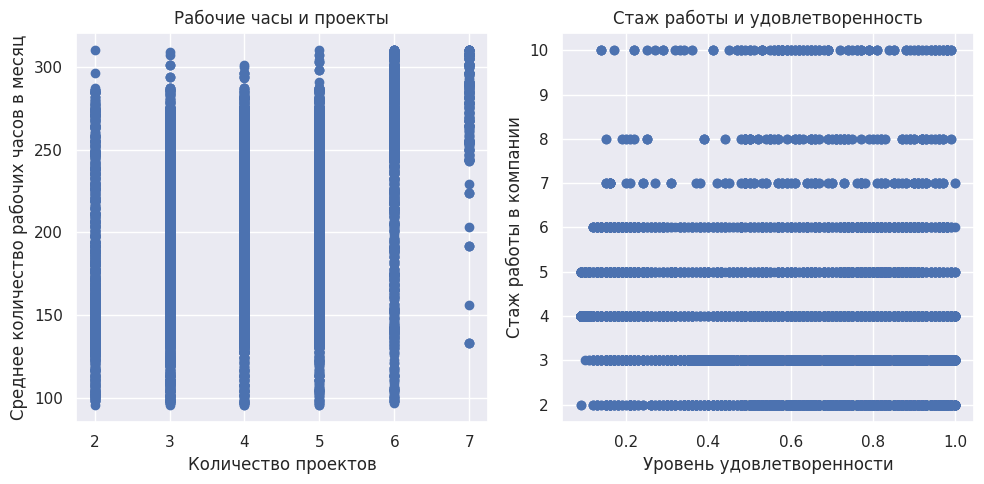

In [48]:
df = pd.DataFrame(data)

# Создание subplot с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# График 1: Количество проектов и Среднее количество рабочих часов в месяц
ax1.scatter(df['number_project'], df['average_montly_hours'])
ax1.set_xlabel('Количество проектов')
ax1.set_ylabel('Среднее количество рабочих часов в месяц')
ax1.set_title('Рабочие часы и проекты')

# График 2: Уровень удовлетворенности и Стаж работы в компании
ax2.scatter(df['satisfaction_level'], df['time_spend_company'])
ax2.set_xlabel('Уровень удовлетворенности')
ax2.set_ylabel('Стаж работы в компании')
ax2.set_title('Стаж работы и удовлетворенность')


# Отображение диаграммы
plt.tight_layout()
plt.show()


**Рабочие часы и проекты**

Видно что у сотрудноков которые за время работы в компании выполнили 7 проектов много пробелов в данных о среднем количестве рабочих часов в диапазоне от 100 до 240 и много значений в диапазоне от 240 до 300.

Возможно, что количество проектов у сотрудника может быть связано с его загруженностью на работе и средним количеством рабочих часов в месяц. Более высокое количество проектов может означать, что у сотрудника больше работы и он вынужден работать больше часов, чтобы выполнить все задачи.

**Стаж работы и удовлетворенность**

Стотрудники работающие более 7-лет как правило оценивали свой уровень удовлетворенности выше 50%.
Это видно по пробелам в значениях от 0 до 50%

Это может свидетельствовать о том, что сотрудники с более длительным стажем чувствуют большую лояльность и удовлетворенность в компании. Это может быть связано с различными факторами, такими как стабильность работы, повышенные возможности для карьерного роста и развития, хорошие отношения с коллегами и руководством, а также удовлетворение от выполняемых задач и проектов.






### Рассчитаем сколько сотрудников работает в каждом департаменте




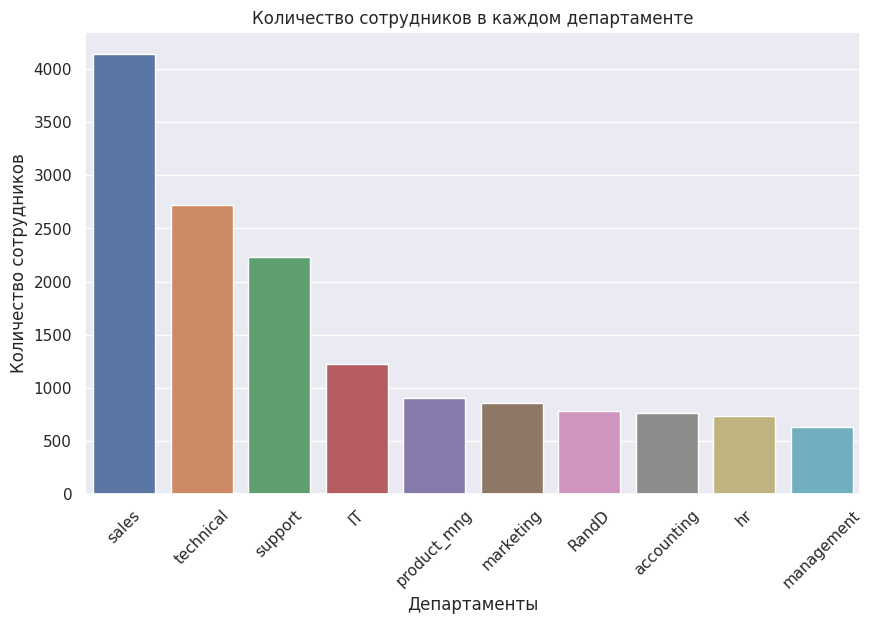


Количество сотрудников в каждом отделе:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [49]:
# Устанавливаем стиль графика
sns.set(style="darkgrid")

# Создаем график гистограммы
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=data, order=data['department'].value_counts().index)

# Настройки осей и заголовка на русском языке
plt.xlabel('Департаменты')
plt.ylabel('Количество сотрудников')
plt.title('Количество сотрудников в каждом департаменте')

# Поворот названий департаментов
plt.xticks(rotation=45)

# Выводим график
plt.show()

department_counts = data["department"].value_counts()

# Вывод количества сотрудников в каждом отделе
print()
print("Количество сотрудников в каждом отделе:")
print(department_counts)

### Распределение сотрудников по зарплатам

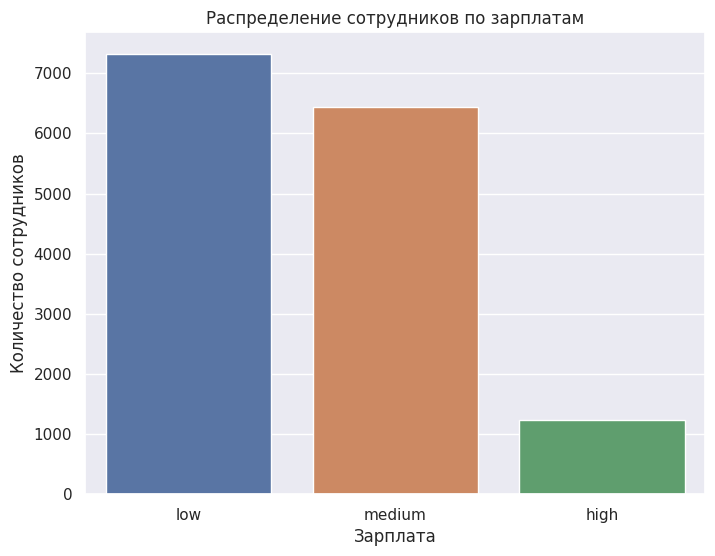

Распределение уровня зарплаты сотрудников:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [51]:
# Устанавливаем стиль графика
sns.set(style="darkgrid")

# Создаем гистограмму распределения зарплат
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', data=data)

# Настройки осей и заголовка
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')

# Выводим график
plt.show()

# Распределение уровня зарплаты сотруднико
salary_counts = data["salary"].value_counts()

# Вывод распределения уровня зарплаты сотрудников
print("Распределение уровня зарплаты сотрудников:")
print(salary_counts)

### Распределение сотрудников по зарплатам в каждом департаменте по отдельности

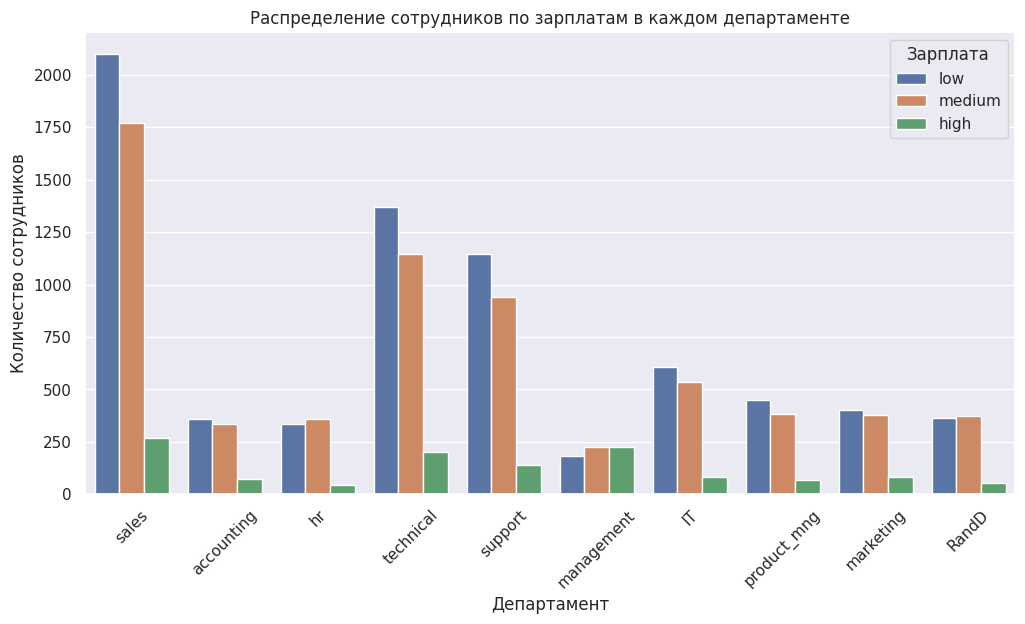

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


In [52]:
# Устанавливаем стиль графика
sns.set(style="darkgrid")

# Создаем гистограмму распределения зарплат для каждого департамента
plt.figure(figsize=(12, 6))
sns.countplot(x='department', hue='salary', data=data)

# Настройки осей и заголовка
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')

# Поворот названий департаментов
plt.xticks(rotation=45)

# Легенда
plt.legend(title='Зарплата')

# Выводим график
plt.show()

# Создание датафрейма с распределением сотрудников по зарплатам в каждом департаменте
salary_distribution = data.groupby(['department', 'salary']).size().unstack()

# Вывод датафрейма
print(salary_distribution)

### Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

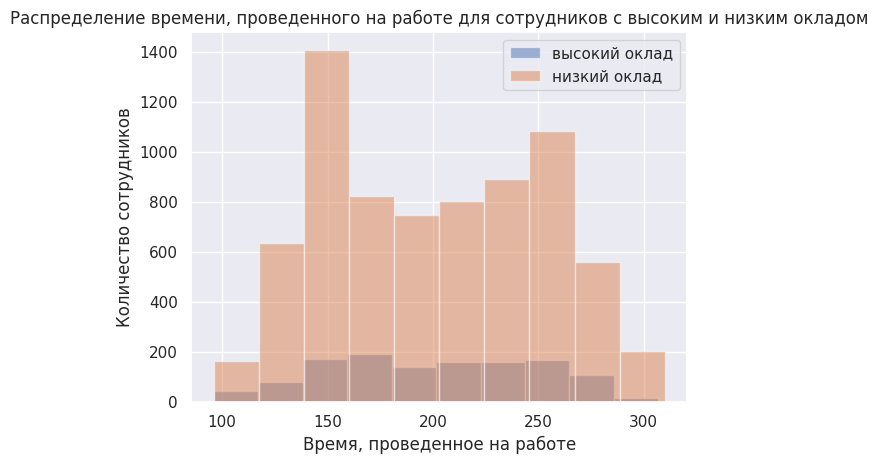

Нет статистически значимой разницы во времени, проведенном на работе, между сотрудниками с высоким и низким окладом
t-статистика: -0.7288680398062308
p-значение: 0.4661023478267259

Базовые статистики для сотрудников с высоким окладом:
count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64

Базовые статистики для сотрудников с низким окладом:
count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64


In [56]:
# Создаем две выборки из времени проведенного на работе
high_salary_hours = data[data['salary'] == 'high']['average_montly_hours']
low_salary_hours = data[data['salary'] == 'low']['average_montly_hours']

# Применяем t-тест
t_stat, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)
alpha = 0.05

# Визуализация результатов
plt.hist(high_salary_hours, alpha=0.5, label='высокий оклад')
plt.hist(low_salary_hours, alpha=0.5, label='низкий оклад')
plt.legend()
plt.xlabel('Время, проведенное на работе')
plt.ylabel('Количество сотрудников')
plt.title('Распределение времени, проведенного на работе для сотрудников с высоким и низким окладом')
plt.show()

# Вывод результатов
if p_value < alpha:
    if t_stat < 0:
        print('Сотрудники с высоким окладом в среднем проводят на работе меньше времени, чем сотрудники с низким окладом')
    else:
        print('Сотрудники с высоким окладом в среднем проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('Нет статистически значимой разницы во времени, проведенном на работе, между сотрудниками с высоким и низким окладом')

print('t-статистика:', t_stat)
print('p-значение:', p_value)

# Вывод базовых статистик
print('\nБазовые статистики для сотрудников с высоким окладом:')
print(high_salary_hours.describe())

print('\nБазовые статистики для сотрудников с низким окладом:')
print(low_salary_hours.describe())

Значение t-статистики составляет -0.73, что означает, что сотрудники с высоким окладом в среднем проводят на работе немного меньше времени, чем сотрудники с низким окладом. Однако, p-значение равно 0.466, что означает, что разница во времени, проведенном на работе, между сотрудниками с высоким и низким окладом не является статистически значимой.

Из базовых статистик времени, проведенного на работе, для сотрудников с высоким и низким окладом следующие наблюдения:

Мы видим, что среднее значение времени, проведенного на работе, для сотрудников с высоким окладом немного ниже, чем для сотрудников с низким окладом (199.87 против 200.99). Однако, разница незначительна и статистически незначима (p-значение равно 0.466). Также можно отметить, что данные обеих групп имеют похожую структуру, с похожими значениями перцентилей и разбросом.


### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

#### Доля сотрудников с повышением за последние 5 лет

#### Средняя степень удовлетворенности

#### Среднее количество проектов

### Построиv модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).